Ejecutando en Kaggle...
GPU disponible: Tesla P100-PCIE-16GB
Total de Textos: 572, Clases: Counter({1: 286, 0: 286})


Map:   0%|          | 0/572 [00:00<?, ? examples/s]

Iniciando entrenamiento...


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Época 0: val_loss promedio=0.7016, val_acc promedio=0.5519


Validation: |          | 0/? [00:00<?, ?it/s]

Época 1: val_loss promedio=0.7014, val_acc promedio=0.4753


Validation: |          | 0/? [00:00<?, ?it/s]

Época 2: val_loss promedio=0.6998, val_acc promedio=0.4916


Validation: |          | 0/? [00:00<?, ?it/s]

Época 3: val_loss promedio=0.6985, val_acc promedio=0.4331


Validation: |          | 0/? [00:00<?, ?it/s]

Época 4: val_loss promedio=0.6911, val_acc promedio=0.5261


Validation: |          | 0/? [00:00<?, ?it/s]

Época 5: val_loss promedio=0.6852, val_acc promedio=0.5675


Validation: |          | 0/? [00:00<?, ?it/s]

Época 6: val_loss promedio=0.6797, val_acc promedio=0.5585


Validation: |          | 0/? [00:00<?, ?it/s]

Época 7: val_loss promedio=0.6493, val_acc promedio=0.6091


Validation: |          | 0/? [00:00<?, ?it/s]

Época 8: val_loss promedio=0.6397, val_acc promedio=0.6116


Validation: |          | 0/? [00:00<?, ?it/s]

Época 9: val_loss promedio=0.6314, val_acc promedio=0.6682


Validation: |          | 0/? [00:00<?, ?it/s]

Época 10: val_loss promedio=0.6314, val_acc promedio=0.6431


Validation: |          | 0/? [00:00<?, ?it/s]

Época 11: val_loss promedio=0.6201, val_acc promedio=0.6568


Validation: |          | 0/? [00:00<?, ?it/s]

Época 12: val_loss promedio=0.6284, val_acc promedio=0.6288


Validation: |          | 0/? [00:00<?, ?it/s]

Época 13: val_loss promedio=0.6443, val_acc promedio=0.5702


Validation: |          | 0/? [00:00<?, ?it/s]

Época 14: val_loss promedio=0.6629, val_acc promedio=0.6165


Validation: |          | 0/? [00:00<?, ?it/s]

Época 15: val_loss promedio=0.6295, val_acc promedio=0.6288


Validation: |          | 0/? [00:00<?, ?it/s]

Época 16: val_loss promedio=0.6119, val_acc promedio=0.6423


Validation: |          | 0/? [00:00<?, ?it/s]

Época 17: val_loss promedio=0.6115, val_acc promedio=0.6733


Validation: |          | 0/? [00:00<?, ?it/s]

Época 18: val_loss promedio=0.6228, val_acc promedio=0.6556


Validation: |          | 0/? [00:00<?, ?it/s]

Época 19: val_loss promedio=0.6277, val_acc promedio=0.6118
Cargando el mejor modelo guardado...
Mejor modelo cargado desde: /kaggle/working/checkpoints/mejor-modelo-v6.ckpt
Evaluando en conjunto de prueba...


Testing: |          | 0/? [00:00<?, ?it/s]

Matriz de Confusión:
tensor([[22, 10],
        [ 5, 19]], device='cuda:0')


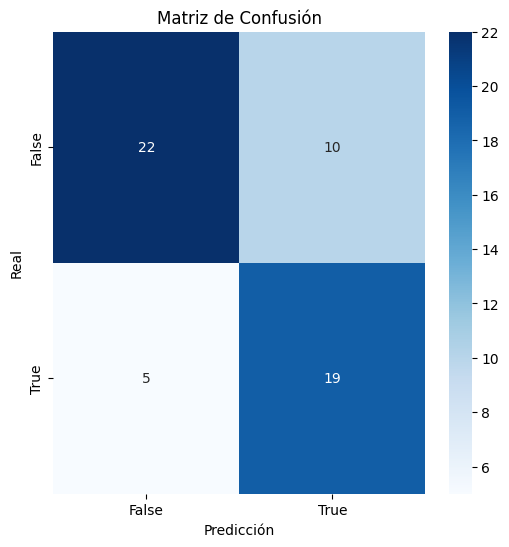

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7321428656578064     │
│         test_auc          │    0.8294270634651184     │
│        test_calib         │    0.12646904587745667    │
│          test_f1          │    0.7169811129570007     │
│      test_precision       │    0.6551724076271057     │
│        test_recall        │    0.7916666865348816     │
└───────────────────────────┴───────────────────────────┘

Generando predicciones...


Predicting: |          | 0/? [00:00<?, ?it/s]


Predicciones en conjunto de prueba:
                                                 texto categoría predicción
296  Las vacunas contra la COVID-19 -13 de ellas en...      True       True
336  Si eres de los que ama tomarse una copita de v...      True       True
99   Así lo reveló el estudio en el que participaro...      True       True
516  Vacaciones de Semana Santa, buen tiempo, el ha...      True       True
227  Varios vuelos con salida de Casablanca y desti...      True      False
344  Se está haciendo viral tras recuperarse una gr...     False      False
74   MASCARILLAS.... PREFERENTEMENTE PARA CARNAVAL ...     False      False
207  El Laboratorio Biológico Chino de Wuhan es en ...     False      False
480  El Papa Francisco podría estar enfermo de Coro...     False       True
325  El expresidente del Gobierno Felipe González h...     False       True
174  Una veintena de jóvenes del entorno abertzale ...     False       True
431  El embarazo es parte de nuestra sexualidad y v

Testing: |          | 0/? [00:00<?, ?it/s]

Matriz de Confusión:
tensor([[22, 10],
        [ 5, 19]], device='cuda:0')


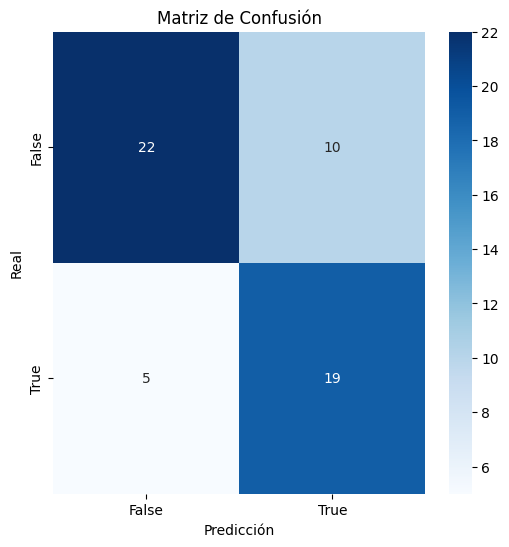

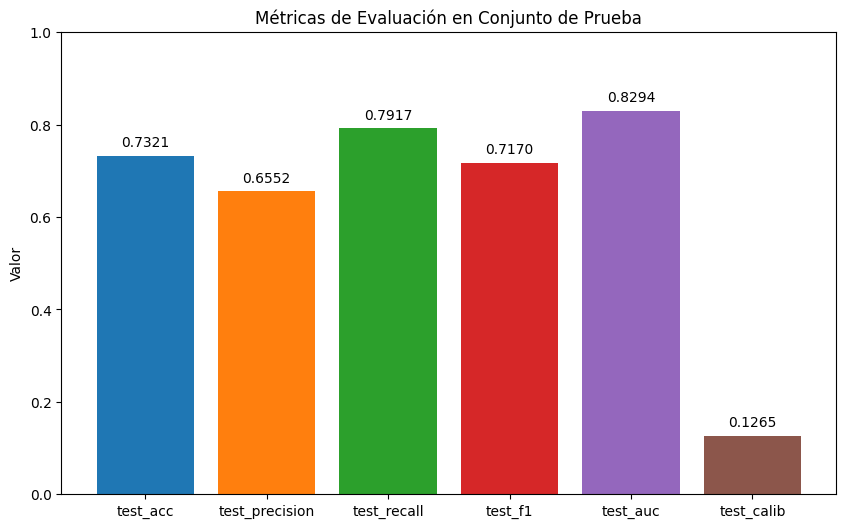


Predicción de ejemplo: 'El presidente anunció nuevas medidas económicas.' -> False (Confianza: 0.7427)


In [17]:
import subprocess
import sys
import os
import logging
import pkg_resources
from collections import Counter
import torch
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, logging as hf_logging
from torch.optim import AdamW
from transformers import get_cosine_schedule_with_warmup
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import nlpaug.augmenter.word as naw
from torch import nn
from tqdm.auto import tqdm
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torchmetrics.classification import Accuracy, Precision, Recall, F1Score, AUROC, CalibrationError, ConfusionMatrix
from peft import LoraConfig, get_peft_model

# Configuración de logging
logging.basicConfig(
    filename='training.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)
logging.getLogger("xla").setLevel(logging.CRITICAL)
logging.getLogger("tensorflow").setLevel(logging.CRITICAL)
logging.getLogger().setLevel(logging.CRITICAL)
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    sys.stderr = open('/dev/null', 'w')

# Detectar entorno (Kaggle, Colab o local)
IN_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ
IN_COLAB = False
if not IN_KAGGLE:
    try:
        import google.colab
        IN_COLAB = True
        print("Ejecutando en Google Colab...")
        logger.info("Ejecutando en Google Colab")
    except ImportError:
        print("Ejecutando localmente...")
        logger.info("Ejecutando localmente")
else:
    print("Ejecutando en Kaggle...")
    logger.info("Ejecutando en Kaggle")

# Instalar dependencias con salida suprimida
def install_package(package, extra_index_url=None):
    cmd = [sys.executable, "-m", "pip", "install", package, "--quiet", "--no-warn-conflicts"]
    if extra_index_url:
        cmd.extend(["--index-url", extra_index_url])
    subprocess.run(cmd, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

def check_package(package_name, required_version):
    try:
        installed_version = pkg_resources.get_distribution(package_name).version
        return installed_version == required_version
    except pkg_resources.DistributionNotFound:
        return False

if IN_COLAB or IN_KAGGLE:
    if not check_package("torch", "2.7.1"):
        install_package("torch==2.7.1 torchvision==0.22.1 torchaudio==2.7.1", "https://download.pytorch.org/whl/cu118")
    if not check_package("numpy", "1.26.4"):
        install_package("numpy==1.26.4 pandas==2.2.2 pyarrow==15.0.2")
    if not check_package("lightning", "2.4.0"):
        install_package("lightning==2.4.0 datasets==3.0.1 transformers==4.45.2 sentence-transformers==3.2.1 peft==0.13.2 nltk==3.9.1")
    if not check_package("nlpaug", "1.1.11"):
        install_package("nlpaug==1.1.11")

# Configurar caché persistente en Kaggle
if IN_KAGGLE:
    cache_dir = "/kaggle/working/hf_cache"
    os.makedirs(cache_dir, exist_ok=True)
    os.environ["HF_HOME"] = cache_dir

# Verificar instalación de paquetes clave
try:
    import numpy
    import transformers
    import nlpaug
    import torch
    import datasets
except ImportError as e:
    logger.error(f"Error al importar un paquete clave: {e}")
    print(f"Error al importar un paquete clave: {e}")
    raise

# Configuraciones para compatibilidad
num_workers = 0 if IN_COLAB or IN_KAGGLE else 8
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
stop_words = set(stopwords.words('spanish'))

# Suprimir advertencias y configurar entorno
import warnings
warnings.filterwarnings('ignore')
os.environ["TOKENIZERS_PARALLELISM"] = "false"
hf_logging.set_verbosity_error()
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/usr/lib/cuda"
torch.set_float32_matmul_precision('medium')

# Preprocesamiento de Textos
def preprocess_text(text):
    if not isinstance(text, str) or not text.strip():
        return "texto_vacío"
    return text.lower().strip()

# Cargar y Explorar Dataset
def load_and_explore_dataset():
    dataset = load_dataset("mariagrandury/fake_news_corpus_spanish", split="test")
    df = dataset.to_pandas()
    df['CATEGORY'] = df['CATEGORY'].astype(int)
    df['TEXT'] = df['TEXT'].apply(preprocess_text)
    class_counts = Counter(df['CATEGORY'])
    total = sum(class_counts.values())
    class_weights = {k: total / (len(class_counts) * v) for k, v in class_counts.items()}
    print(f"Total de Textos: {len(df)}, Clases: {class_counts}")
    logger.info(f"Dataset cargado con {len(df)} ejemplos, Clases: {class_counts}")
    return dataset, torch.tensor([class_weights[i] for i in range(len(class_weights))])

# Pre-tokenización
def preprocess_dataset(dataset, tokenizer, seq_length=256):
    def tokenize_function(examples):
        tokenized = tokenizer(
            [preprocess_text(text) for text in examples['TEXT']],
            max_length=seq_length,
            padding='max_length',
            truncation=True
        )
        tokenized['labels'] = [1 if cat == 1 else 0 for cat in examples['CATEGORY']]
        return tokenized
    return dataset.map(
        tokenize_function,
        batched=True,
        batch_size=500,  # Controlar tamaño de lote para evitar desajustes
        num_proc=4 if not (IN_COLAB or IN_KAGGLE) else 1,
        remove_columns=dataset.column_names  # Eliminar todas las columnas originales
    )

# Dividir Dataset
def split_dataset(dataset):
    dataset_size = len(dataset)
    train_size = int(0.8 * dataset_size)
    val_size = int(0.1 * dataset_size)
    test_size = dataset_size - train_size - val_size
    train_subset, val_subset, test_subset = random_split(
        dataset, lengths=[train_size, val_size, test_size], generator=torch.Generator().manual_seed(42)
    )
    return train_subset, val_subset, test_subset

# Clase de Dataset Personalizado
class FakeNewsCorpusSpanishDataset(Dataset):
    def __init__(self, tokenized_dataset, augment=False, model_name="dccuchile/bert-base-spanish-wwm-cased"):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.tokenized_dataset = tokenized_dataset
        self.augment = augment
        self.aug_context = None if not augment else naw.ContextualWordEmbsAug(
            model_path=model_name, aug_p=0.15, action="substitute", device='cuda' if torch.cuda.is_available() else 'cpu'
        )
        self.aug_synonym = None if not augment else naw.SynonymAug(aug_p=0.3, aug_max=4)
        self.id_2_class_map = {0: 'False', 1: 'True'}
        self.class_2_id_map = {'False': 0, 'True': 1}
        self.num_classes = len(self.id_2_class_map)

    def __getitem__(self, index):
        item = self.tokenized_dataset[index]
        text = self.tokenizer.decode(item['input_ids'], skip_special_tokens=True)
        if self.augment and self.aug_context:
            if np.random.rand() < 0.6:
                try:
                    text = self.aug_context.augment(text)[0]
                    text = self.aug_synonym.augment(text)[0]
                    tokenized = self.tokenizer(
                        text, max_length=256, padding='max_length', truncation=True, return_tensors='pt'
                    )
                    input_ids = tokenized['input_ids'].squeeze(0)
                    attention_mask = tokenized['attention_mask'].squeeze(0)
                except (ValueError, IndexError) as e:
                    logger.warning(f"Error en aumentación: {e}")
                    input_ids = torch.tensor(item['input_ids'], dtype=torch.long)
                    attention_mask = torch.tensor(item['attention_mask'], dtype=torch.long)
            else:
                input_ids = torch.tensor(item['input_ids'], dtype=torch.long)
                attention_mask = torch.tensor(item['attention_mask'], dtype=torch.long)
        else:
            input_ids = torch.tensor(item['input_ids'], dtype=torch.long)
            attention_mask = torch.tensor(item['attention_mask'], dtype=torch.long)
        label = item['labels']
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'y': torch.tensor(label, dtype=torch.long)
        }

    def __len__(self):
        return len(self.tokenized_dataset)

# Módulo de PyTorch Lightning
class SpanishFakeNewsClassifier(pl.LightningModule):
    def __init__(self, num_classes, train_size, class_weights, lr=5e-5, weight_decay=1e-2, dropout=0.5, label_smoothing=0.05, model_name="dccuchile/bert-base-spanish-wwm-cased"):
        super().__init__()
        self.save_hyperparameters()
        self.model_name = model_name
        self.train_size = train_size
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_classes, ignore_mismatched_sizes=True)
        lora_config = LoraConfig(
            r=32, lora_alpha=32, target_modules=["query", "key", "value", "dense"],
            lora_dropout=0.1, bias="none", task_type="SEQ_CLS"
        )
        self.model = get_peft_model(self.model, lora_config)
        self.model.dropout = nn.Dropout(dropout)
        self.model.classifier.dropout = nn.Dropout(dropout)
        self.loss_fn = nn.CrossEntropyLoss(weight=class_weights.to('cuda' if torch.cuda.is_available() else 'cpu'), label_smoothing=label_smoothing)
        self.train_acc = Accuracy(task='binary', num_classes=num_classes)
        self.val_acc = Accuracy(task='binary', num_classes=num_classes)
        self.test_acc = Accuracy(task='binary', num_classes=num_classes)
        self.test_precision = Precision(task='binary', num_classes=num_classes)
        self.test_recall = Recall(task='binary', num_classes=num_classes)
        self.test_f1 = F1Score(task='binary', num_classes=num_classes)
        self.test_auc = AUROC(task='binary', num_classes=num_classes)
        self.test_calib = CalibrationError(task='binary', num_classes=num_classes)
        self.test_conf_matrix = ConfusionMatrix(task='binary', num_classes=num_classes)
        self.val_metrics = []

    def forward(self, input_ids, attention_mask):
        with torch.amp.autocast(device_type='cuda' if torch.cuda.is_available() else 'cpu'):
            return self.model(input_ids=input_ids, attention_mask=attention_mask).logits

    def training_step(self, batch, batch_idx):
        input_ids, attention_mask, y = batch['input_ids'], batch['attention_mask'], batch['y']
        logits = self(input_ids, attention_mask)
        loss = self.loss_fn(logits, y)
        probs = logits.softmax(dim=-1)[:, 1]
        self.train_acc(probs, y)
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', self.train_acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        input_ids, attention_mask, y = batch['input_ids'], batch['attention_mask'], batch['y']
        logits = self(input_ids, attention_mask)
        loss = self.loss_fn(logits, y)
        probs = logits.softmax(dim=-1)[:, 1]
        self.val_acc(probs, y)
        self.val_metrics.append({'val_loss': loss.item(), 'val_acc': self.val_acc.compute().item()})
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', self.val_acc, prog_bar=True)

    def test_step(self, batch, batch_idx):
        input_ids, attention_mask, y = batch['input_ids'], batch['attention_mask'], batch['y']
        logits = self(input_ids, attention_mask)
        probs = logits.softmax(dim=-1)[:, 1]
        preds = torch.argmax(logits, dim=-1)
        self.test_acc(probs, y)
        self.test_precision(probs, y)
        self.test_recall(probs, y)
        self.test_f1(probs, y)
        self.test_auc(probs, y)
        self.test_calib(probs, y)
        self.test_conf_matrix(preds, y)
        self.log('test_acc', self.test_acc, prog_bar=True)
        self.log('test_precision', self.test_precision, prog_bar=True)
        self.log('test_recall', self.test_recall, prog_bar=True)
        self.log('test_f1', self.test_f1, prog_bar=True)
        self.log('test_auc', self.test_auc, prog_bar=True)
        self.log('test_calib', self.test_calib, prog_bar=True)

    def predict_step(self, batch, batch_idx):
        input_ids, attention_mask = batch['input_ids'], batch['attention_mask']
        logits = self(input_ids, attention_mask)
        probs = logits.softmax(dim=-1)
        return probs

    def configure_optimizers(self):
        optimizer = AdamW(self.parameters(), lr=self.hparams.lr, weight_decay=self.hparams.weight_decay, betas=(0.9, 0.98), eps=1e-6)
        batch_size = 8
        num_training_steps = (self.hparams.train_size // batch_size) * self.trainer.max_epochs
        scheduler = get_cosine_schedule_with_warmup(
            optimizer, num_warmup_steps=int(0.2 * num_training_steps), num_training_steps=num_training_steps
        )
        return dict(optimizer=optimizer, lr_scheduler=dict(scheduler=scheduler, interval='step'))

    def on_train_batch_end(self, outputs, batch, batch_idx):
        torch.nn.utils.clip_grad_norm_(self.parameters(), max_norm=0.5)

    def on_train_epoch_end(self):
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    def on_validation_epoch_end(self):
        if self.val_metrics:
            avg_val_loss = np.mean([m['val_loss'] for m in self.val_metrics])
            avg_val_acc = np.mean([m['val_acc'] for m in self.val_metrics])
            print(f"Época {self.current_epoch}: val_loss promedio={avg_val_loss:.4f}, val_acc promedio={avg_val_acc:.4f}")
            logger.info(f"Época {self.current_epoch}: val_loss promedio={avg_val_loss:.4f}, val_acc promedio={avg_val_acc:.4f}")
            self.val_metrics = []

    def on_test_epoch_end(self):
        conf_matrix = self.test_conf_matrix.compute()
        print(f"Matriz de Confusión:\n{conf_matrix}")
        logger.info(f"Matriz de Confusión:\n{conf_matrix}")
        plt.figure(figsize=(6, 6))
        sns.heatmap(conf_matrix.cpu().numpy(), annot=True, fmt='d', cmap='Blues',
                    xticklabels=['False', 'True'], yticklabels=['False', 'True'])
        plt.title('Matriz de Confusión')
        plt.xlabel('Predicción')
        plt.ylabel('Real')
        plt.show()
        self.test_conf_matrix.reset()

# Función de Predicción
def predict_text(model, tokenizer, text, seq_length=256, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.eval()
    model.to(device)
    text = preprocess_text(text)
    tokenized = tokenizer(text, max_length=seq_length, padding='max_length', truncation=True, return_tensors='pt')
    input_ids = tokenized['input_ids'].to(device)
    attention_mask = tokenized['attention_mask'].to(device)
    with torch.no_grad():
        logits = model(input_ids, attention_mask)
        probs = logits.softmax(dim=-1)
        pred_class = torch.argmax(probs, dim=-1).item()
    id_2_class = {0: 'False', 1: 'True'}
    return id_2_class[pred_class], probs[0][pred_class].item()

# Ejecución Principal
def main():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    if torch.cuda.is_available():
        print(f"GPU disponible: {torch.cuda.get_device_name(0)}")
        logger.info(f"GPU disponible: {torch.cuda.get_device_name(0)}")
    else:
        print("Usando CPU")
        logger.info("Usando CPU")

    dataset, class_weights = load_and_explore_dataset()
    model_name = "dccuchile/bert-base-spanish-wwm-cased"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokenized_dataset = preprocess_dataset(dataset, tokenizer, seq_length=256)
    train_subset, val_subset, test_subset = split_dataset(tokenized_dataset)
    test_indices = test_subset.indices

    train_dataset = FakeNewsCorpusSpanishDataset(tokenized_dataset.select(train_subset.indices), augment=True, model_name=model_name)
    val_dataset = FakeNewsCorpusSpanishDataset(tokenized_dataset.select(val_subset.indices), augment=False, model_name=model_name)
    test_dataset = FakeNewsCorpusSpanishDataset(tokenized_dataset.select(test_subset.indices), augment=False, model_name=model_name)

    batch_size = 8
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, drop_last=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, drop_last=True)

    model = SpanishFakeNewsClassifier(
        num_classes=train_dataset.num_classes,
        train_size=len(train_subset),
        class_weights=class_weights,
        lr=3e-5,
        weight_decay=1e-2,
        dropout=0.3,
        label_smoothing=0.1,
        model_name=model_name
    )

    tb_logger = TensorBoardLogger('tb_logs', name='ClasificadorFakeNewsOptimizado')
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, mode='min'),
        ModelCheckpoint(monitor='val_acc', mode='max', save_top_k=1, filename='mejor-modelo', dirpath='checkpoints')
    ]

    trainer = pl.Trainer(
        max_epochs=30,
        accelerator="gpu" if torch.cuda.is_available() else "cpu",
        devices=1,
        logger=tb_logger,
        callbacks=callbacks,
        precision="bf16-mixed" if torch.cuda.is_available() else "32-true",
        num_sanity_val_steps=0,
        accumulate_grad_batches=1,
        log_every_n_steps=1
    )

    print("Iniciando entrenamiento...")
    logger.info("Iniciando entrenamiento")
    trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)

    print("Cargando el mejor modelo guardado...")
    best_model_path = trainer.checkpoint_callback.best_model_path
    if best_model_path:
        model = SpanishFakeNewsClassifier.load_from_checkpoint(best_model_path)
        model.to(device)
        print(f"Mejor modelo cargado desde: {best_model_path}")
        logger.info(f"Mejor modelo cargado desde: {best_model_path}")
    else:
        print("No se encontró un punto de control, usando el modelo de la última época.")
        logger.warning("No se encontró un punto de control, usando el modelo de la última época.")

    print("Evaluando en conjunto de prueba...")
    logger.info("Evaluando en conjunto de prueba")
    trainer.test(model, dataloaders=test_loader)

    print("Generando predicciones...")
    logger.info("Generando predicciones")
    model.eval()
    predictions = trainer.predict(model, dataloaders=test_loader)
    predictions = torch.cat(predictions, dim=0)
    predictions = torch.argmax(predictions, dim=-1)
    predictions = [train_dataset.id_2_class_map[pred.item()] for pred in predictions]
    df = pd.DataFrame({
        "texto": [dataset[i]['TEXT'] for i in test_indices],
        "categoría": [train_dataset.id_2_class_map[dataset[i]['CATEGORY']] for i in test_indices],
        "predicción": predictions[:len(test_indices)]
    }, index=test_indices)
    print("\nPredicciones en conjunto de prueba:")
    print(df.head(15))
    logger.info(f"Primeras 15 predicciones:\n{df.head(15)}")

    test_results = trainer.test(model, dataloaders=test_loader, verbose=False)[0]
    metrics = ['test_acc', 'test_precision', 'test_recall', 'test_f1', 'test_auc', 'test_calib']
    values = [test_results.get(m, 0) for m in metrics]
    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
    plt.title('Métricas de Evaluación en Conjunto de Prueba')
    plt.ylabel('Valor')
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
    plt.show()

    sample_text = "El presidente anunció nuevas medidas económicas."
    prediction, confidence = predict_text(model, tokenizer, sample_text)
    print(f"\nPredicción de ejemplo: '{sample_text}' -> {prediction} (Confianza: {confidence:.4f})")
    logger.info(f"Predicción de ejemplo: '{sample_text}' -> {prediction} (Confianza: {confidence:.4f})")

if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"Error en la ejecución principal: {e}")
        logger.error(f"Error en la ejecución principal: {e}")
        raise
